In [14]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import sys
sys.path.append('../..')
from model import FinData
from model import merged_split
from model import CatboostFinModel
from model import mul_PCA

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

The IPython.extensions.autoreload extension is already loaded. To reload it, use:
  %reload_ext IPython.extensions.autoreload


In [15]:
data = FinData("../../datasets/Gazprom_1_min.csv")
dir(data)[20: 40]

['__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fill_skips',
 'cat_features',
 'check_stationarity',
 'df',
 'get_cat_features',
 'get_columns',
 'get_numeric_features',
 'insert_all',
 'insert_angle',
 'insert_angle_ln',
 'insert_bollinger',
 'insert_butter_filter']

In [16]:
data = FinData("../../datasets/Gazprom_1_min.csv")
news_df = pd.read_csv('../../markettwits_with_hashtags.csv')

data.restrict_time_down(dt.datetime(2024, 4, 1))
data.insert_news_features(news_df)

data.df.sample(5)

,utc,open,close,high,low,volume,direction_binary_0,direction_binary_1,new_label,time_from_new
36384,2024-05-16 10:00:00,157.45,157.45,157.46,157.45,1367,1,1,0,180
81154,2024-07-10 15:16:00,119.09,119.05,119.10,118.93,7897,1,1,1,26
37754,2024-05-17 19:38:00,155.24,155.26,155.26,155.24,820,0,0,0,418
120275,2024-08-25 09:58:00,119.53,119.40,119.53,119.39,11,1,1,0,176
1614,2024-04-02 20:42:00,164.03,164.03,164.07,164.00,2735,1,1,0,278


In [19]:
data.df.sample(5)

,utc,open,close,high,low,volume,direction_binary_0,direction_binary_1,new_label,time_from_new
38031,2024-05-18 10:26:00,155.20,155.18,155.25,155.18,126,1,1,0,695
36818,2024-05-16 17:33:00,157.38,157.56,157.56,157.37,4178,1,1,0,614
11193,2024-04-15 08:56:00,164.72,164.74,164.78,164.72,1576,0,1,0,116
35667,2024-05-15 11:34:00,155.02,155.09,155.09,155.02,2192,0,0,0,49
44373,2024-05-26 07:58:00,133.35,133.36,133.36,133.24,94,0,0,0,1383


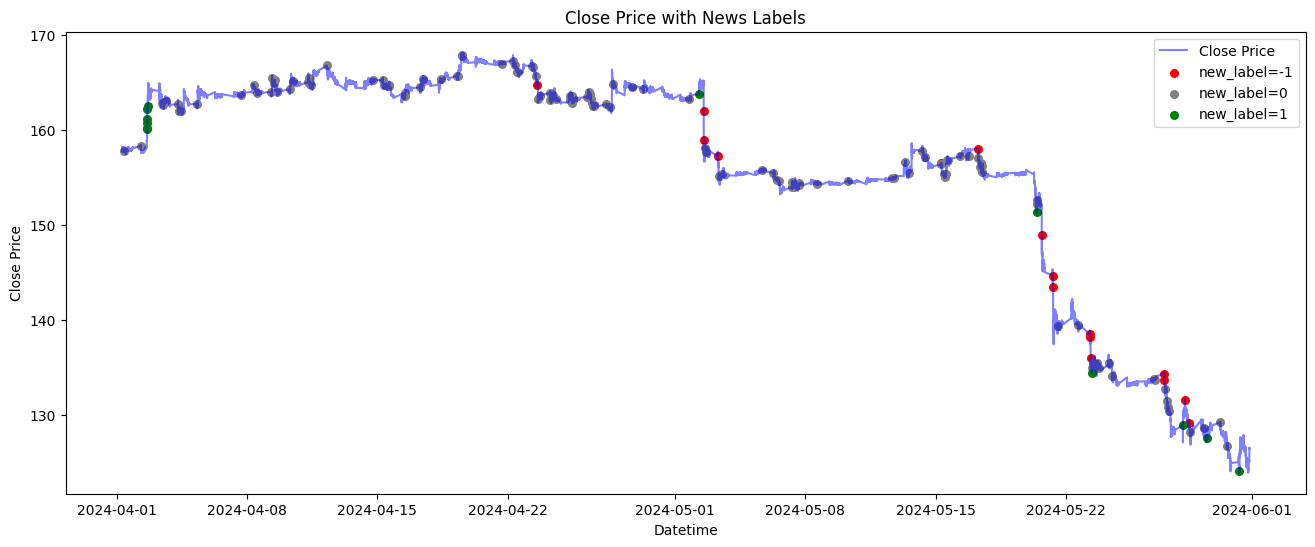

In [20]:
# data.restrict_time_up(dt.datetime(2024, 6, 1))

# Предполагается, что в data.df есть столбцы 'close', 'datetime', 'new_label', 'time_from_new'
plt.figure(figsize=(16, 6))
plt.plot(data.df['utc'], data.df['close'], label='Close Price', color='blue', alpha=0.5)

# Фильтруем точки, где time_from_new == 0
mask = data.df['time_from_new'] == 0

# Рисуем точки по new_label
colors = {-1: 'red', 0: 'grey', 1: 'green'}
for label, color in colors.items():
    idx = (data.df['new_label'] == label) & mask
    plt.scatter(data.df.loc[idx, 'utc'], data.df.loc[idx, 'close'], color=color, label=f'new_label={label}', s=30)

plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.title('Close Price with News Labels')
plt.legend()
plt.show()